In [1]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/인종 (2).zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/human')
zip_ref.close()

# 경로설정

In [4]:
#기본경로
base_dir='/content/human'

asian_dir=os.path.join(base_dir,'Asian')
caucasian_dir=os.path.join(base_dir,'Caucasian')
indian_dir=os.path.join(base_dir,'Indian')
negroids_dir=os.path.join(base_dir,'Negroids')

In [5]:
#리스트
asian_list=os.listdir(asian_dir)
caucasian_list=os.listdir(caucasian_dir)
indian_list=os.listdir(indian_dir)
negroids_list=os.listdir(negroids_dir)

In [6]:
print('asian {}'.format(len(asian_list)))
print('caucasian {}'.format(len(caucasian_list)))
print('indian {}'.format(len(indian_list)))
print('negroids {}'.format(len(negroids_list)))

asian 343
caucasian 147
indian 144
negroids 336


In [7]:
343+147+144+336

970

# 데이터전처리

In [8]:
batch=32
img_height=250
img_width=250

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest',
                                 validation_split=0.1
                                )

train_generator=train_datagen.flow_from_directory(base_dir,
                                                  batch_size=batch,
                                                  class_mode='sparse',
                                                  target_size=(img_width,img_height),
                                                  subset='training'
                                                  )
val_generator=train_datagen.flow_from_directory(base_dir,
                                              batch_size=batch,
                                              class_mode='sparse',
                                              target_size=(img_width,img_height),
                                              subset='validation'
                                              )

Found 875 images belonging to 4 classes.
Found 95 images belonging to 4 classes.


In [10]:
#각각의 값 
print(train_generator.class_indices.items())

print(val_generator.class_indices.items())

dict_items([('Asian', 0), ('Caucasian', 1), ('Indian', 2), ('Negroids', 3)])
dict_items([('Asian', 0), ('Caucasian', 1), ('Indian', 2), ('Negroids', 3)])


# 모델만들기

In [11]:
import tensorflow as tf

tf.__version__

from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.engine.sequential import Sequential
from tensorflow import keras
from keras import regularizers

In [17]:
kernel_s=(3,3)

model=models.Sequential()

model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(img_height,img_width,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 29, 29, 64)      

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

# 학습하기

In [22]:
history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs=50
                  )

Epoch 1/50
28/28 [==============================] - 15s 521ms/step - loss: 0.4337 - accuracy: 0.8480 - val_loss: 0.8883 - val_accuracy: 0.6842
Epoch 2/50
28/28 [==============================] - 14s 500ms/step - loss: 0.4511 - accuracy: 0.8217 - val_loss: 1.0221 - val_accuracy: 0.7053
Epoch 3/50
28/28 [==============================] - 14s 504ms/step - loss: 0.5056 - accuracy: 0.8491 - val_loss: 0.9629 - val_accuracy: 0.6737
Epoch 4/50
28/28 [==============================] - 14s 494ms/step - loss: 0.4221 - accuracy: 0.8480 - val_loss: 0.9928 - val_accuracy: 0.7474
Epoch 5/50
28/28 [==============================] - 14s 491ms/step - loss: 0.4955 - accuracy: 0.8171 - val_loss: 1.2500 - val_accuracy: 0.7053
Epoch 6/50
28/28 [==============================] - 14s 488ms/step - loss: 0.4582 - accuracy: 0.8320 - val_loss: 1.0717 - val_accuracy: 0.7474
Epoch 7/50
28/28 [==============================] - 14s 498ms/step - loss: 0.4760 - accuracy: 0.8194 - val_loss: 0.7578 - val_accuracy: 0.7579

In [21]:
#모델 저장하기
from keras.models import load_model
model.save('인종분류1.h5')

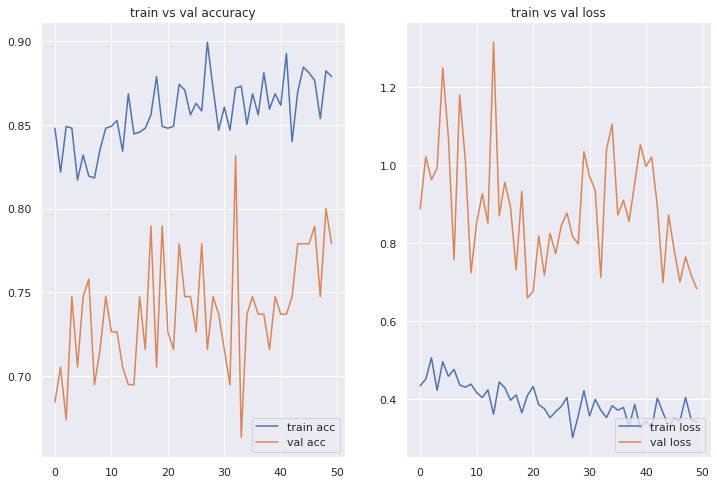

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epoch_range=range(50)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epoch_range, acc, label='train acc')
plt.plot(epoch_range, val_acc, label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='train loss')
plt.plot(epoch_range, val_loss, label='val loss')
plt.legend(loc='lower right')
plt.title('train vs val loss')

plt.show()

# 시각화

In [27]:
import cv2
import glob

test_img_list=[]

test_img_name_list=glob.glob('테스트용/*')

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(img_width, img_height))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    test_img_list.append(src_img)

1/1 [==============================] - 0s 31ms/step


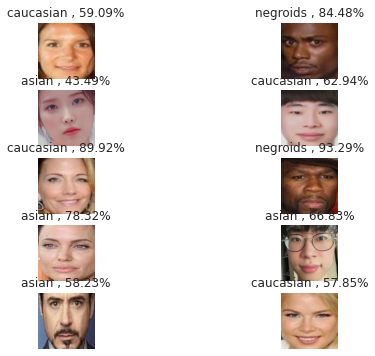

In [29]:
pred=model.predict(np.array(test_img_list))

name=['asian','caucasian','indian','negroids']

plt.figure(figsize=(8,6))

for i in range(len(test_img_list)):
  plt.subplot(5,2,i+1)
  prediction=str(name[np.argmax(pred[i])])
  prob='{0:0.2f}'.format(100*max(pred[i]))
  title_str=prediction+' , '+prob+'%'
  plt.title(title_str)

  plt.imshow(test_img_list[i])
  plt.axis('off')
plt.show()